📂 Upload your dataset CSV file


Saving mushrooms.csv to mushrooms.csv
✅ Dataset loaded: 8124 rows, 23 columns

🌳 Decision Tree Accuracy: 0.975
🌲 Random Forest Accuracy: 1.000


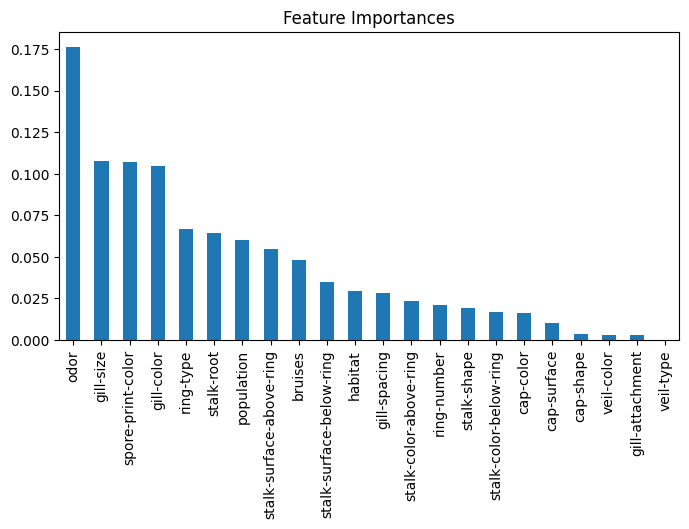

📊 Mean CV Accuracy: 0.885


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from google.colab import files
import graphviz
import matplotlib.pyplot as plt

print("📂 Upload your dataset CSV file")
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])
print(f"✅ Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

target_col = df.columns[0]
X, y = df.drop(target_col, axis=1), df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
print(f"\n🌳 Decision Tree Accuracy: {accuracy_score(y_test, dt.predict(X_test)):.3f}")

dot_data = export_graphviz(dt, out_file=None, feature_names=X.columns, filled=True, rounded=True)
graphviz.Source(dot_data)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print(f"🌲 Random Forest Accuracy: {accuracy_score(y_test, rf.predict(X_test)):.3f}")

feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title="Feature Importances", figsize=(8,4))
plt.show()

cv_score = cross_val_score(rf, X, y, cv=5).mean()
print(f"📊 Mean CV Accuracy: {cv_score:.3f}")
